### Time Series Package Imports

In [1]:
#  NumPy and Pandas imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#  Reading time series
from pandas_datareader import data

#  Time stamps
import datetime as datetime

#  statistics package
from scipy import stats

#  Visualization (sns is a visualization library based on matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#  Stock tickers to retrieve historical index data
ticker_index_data = ['AMD', 'CSCO', 'INTC', 'MU', 'ORCL', 'QCOM']

start = datetime.date(2017, 10, 10)
end = datetime.date(2019, 4, 10)
#start = '2017-10-10'
#end = '2019-04-10'
# #  Assign a database with historical stock quotes from Yahoo! Finance to each ticker
# for ticker in ticker_index_data:
#     globals()[ticker] = data.get_data_yahoo(ticker, start, end)
                                                    #  Changed start to 1.5 years

In [40]:
#  The "axis" param of 1 represents concatenating along the column axis. 
#  The "keys" param is a hierarchical index for each technology stock ticker.
# tech_stocks = pd.concat([AMD, CSCO, INTC, MU, ORCL, QCOM], axis=1, keys=ticker_index_data)
# tech_stocks.columns.names = ['Stock Ticker', 'Stock Description']
# tech_stocks.columns


## Daily Percentage Change
------
To quantify daily change, **percentage change** is calculated as the percentage difference between the prior
and current element. Using this function on the 'Adj Close' attribute gives the daily
return for the technology stock

The pandas DataFrame **.pct_change()** method returns the percentage change 

In [3]:
#  Get the closing prices for each tech stock
stock_closing_prices = data.DataReader(ticker_index_data, 'yahoo', start, end)['Adj Close']


In [4]:
#  Calculate the Daily Return for each stock
tech_daily_change = stock_closing_prices.pct_change()
 

### Summary of Daily Percentage Change
We can see from the Daily Percentage Change sample statistics that each stock averaged a positive change over
the observed period. It also displays the minimum change (biggest price drop) and the maximum
change (biggest price increase) for each stock. Standard deviation describes which stocks
were most volatile. The shape of the distribution is described through the mean and median. The
descriptive statistics show that CSCO, MU, and QCOM have a higher median than mean, so they
are negatively skewed. This means that there are more positive returns above the mean than below the mean,
so the mean must be skewed by negative returns.   

In [5]:
tech_daily_change.describe()


Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,0.002654,0.001569,0.001201,0.000476,0.000459,0.000457
std,0.039583,0.014942,0.019850,0.030250,0.014355,0.018723
min,-0.154454,-0.052529,-0.085890,-0.098708,-0.094321,-0.081633
25%,-0.016918,-0.005552,-0.008827,-0.016053,-0.005119,-0.008238
50%,0.002024,0.002065,0.000897,0.000892,0.001625,0.000617
75%,0.022670,0.008961,0.012217,0.018915,0.008056,0.009259
max,0.199481,0.055042,0.105519,0.113706,0.044507,0.127097


### Visualizing Daily Percentage Change
The Univariate Daily Percentage Change

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd4ac5a390>,
      dtype=object)

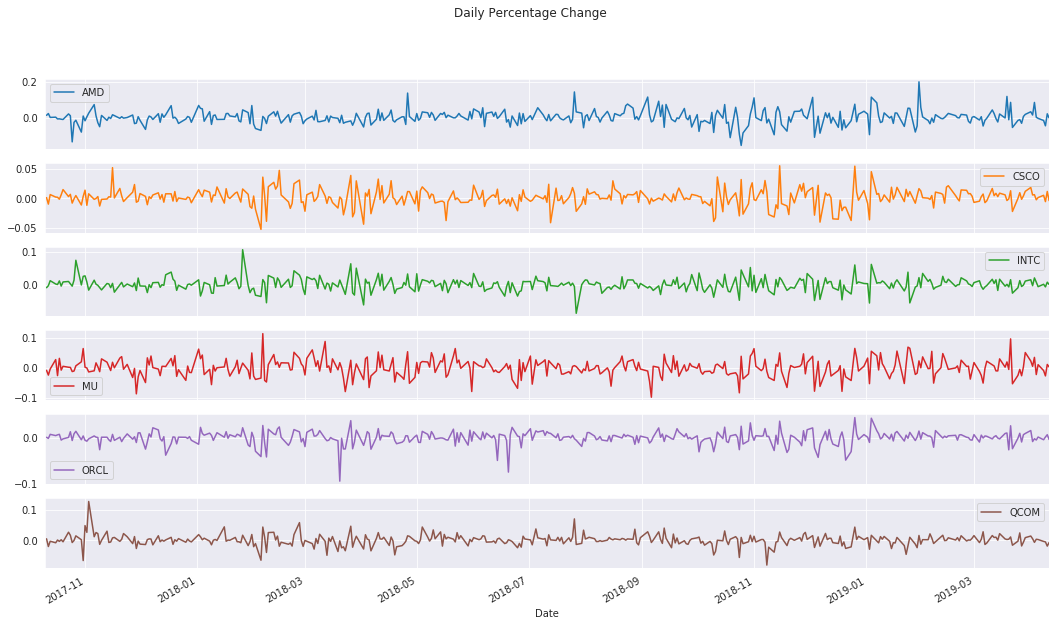

In [6]:
tech_daily_change.plot(legend=True, title='Daily Percentage Change', subplots=True, figsize=(18,10))


### Test Correlation between Daily Percentage Change of each stock
##### Correlation function for Pairplots

In [7]:
def corrfunc(x, y, **kws):
    r, _= stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.4f}".format(r),

                xy=(.1, .9), xycoords=ax.transAxes)

##### Pair plot 
The diagonal shows the distribution of a single variable, the scatter plots
on the upper and lower triangles show the relationship between two variables. 

Linear regression models are fitted to the scatter plots.

kernel density estimates are fitted to the univariate plots 


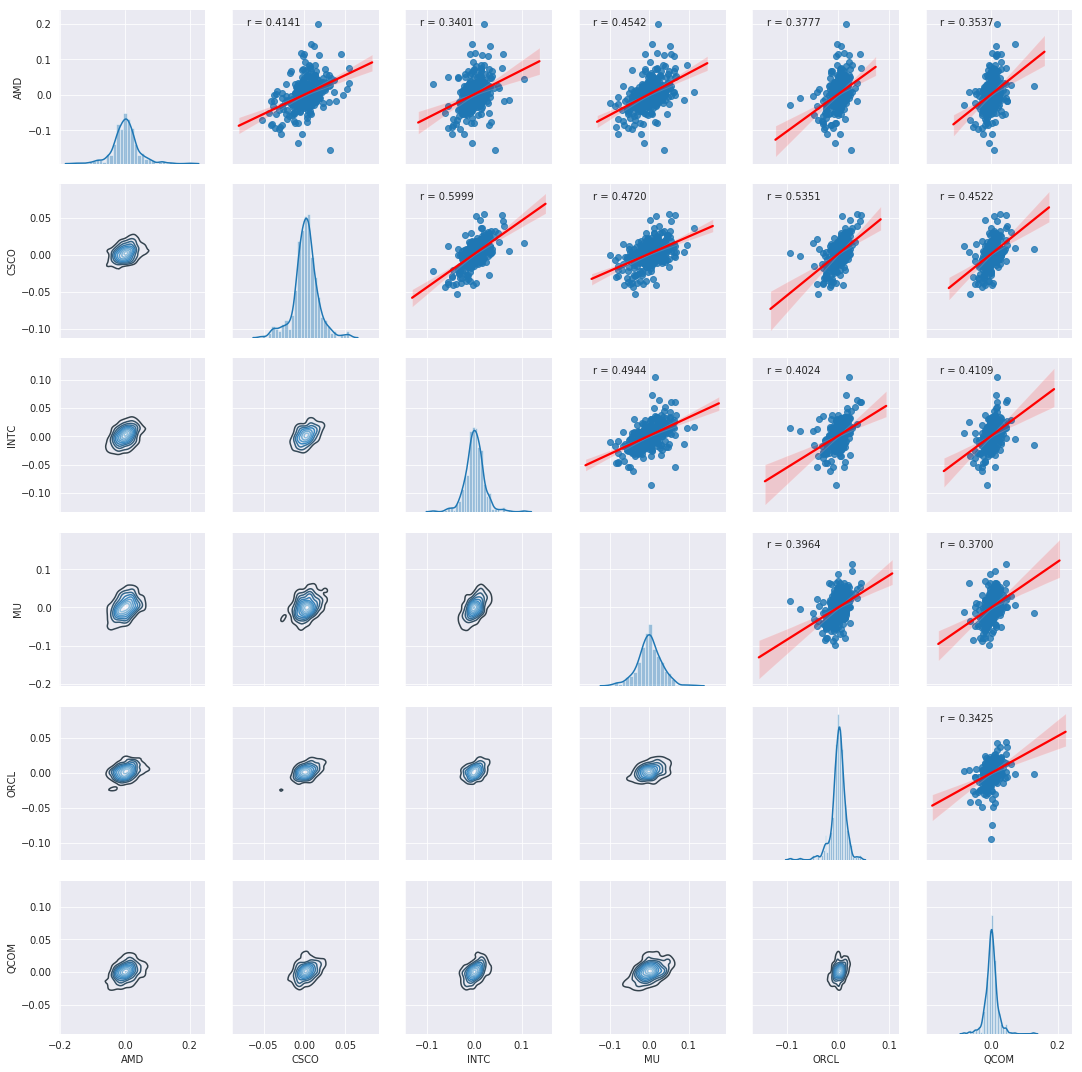

In [9]:
change_pairplot = sns.PairGrid(tech_daily_change.dropna())
change_pairplot.map_upper(sns.regplot, fit_reg=True, line_kws= {'color' : 'red'})
change_pairplot.map_lower(sns.kdeplot, cmap="Blues_d")
change_pairplot.map_diag(sns.distplot)
change_pairplot.map_upper(corrfunc)


##### Correlation Matrix of Daily Percentage Change

In [10]:
# Correlation Matrix of Daily Returns
daily_returns_corr = tech_daily_change.corr()
daily_returns_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
Symbols,,,,,,
AMD,1,0.414,0.34,0.454,0.378,0.354
CSCO,0.414,1,0.6,0.472,0.535,0.452
INTC,0.34,0.6,1,0.494,0.402,0.411
MU,0.454,0.472,0.494,1,0.396,0.37
ORCL,0.378,0.535,0.402,0.396,1,0.343
QCOM,0.354,0.452,0.411,0.37,0.343,1


##### Cluster Map of Daily Percentage Change  

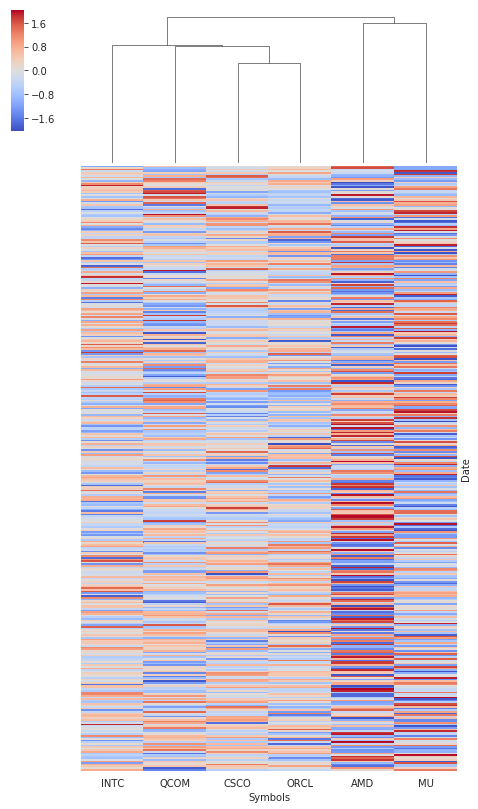

In [11]:
#  Each row is normalized for it's daily return with a z-score
#  The values are measured by correlation
#  Dendrogram displays the results of the cluster analysis
graph_returns = sns.clustermap(tech_daily_change.dropna(), metric="correlation", method='single', 
                                z_score=0, row_cluster=False,
                                cmap='coolwarm',
                                yticklabels=False, figsize=(8,14))

##### Cluster Map of Monthly Percentage Change
Convert Data into months

In [12]:
tech_month_change = tech_daily_change
#tech_month_change.set_index('Date', inplace=True)
tech_month_change.index = pd.to_datetime(tech_month_change.index)
tech_month_change = tech_month_change.resample('M').last()

Display cluster map 

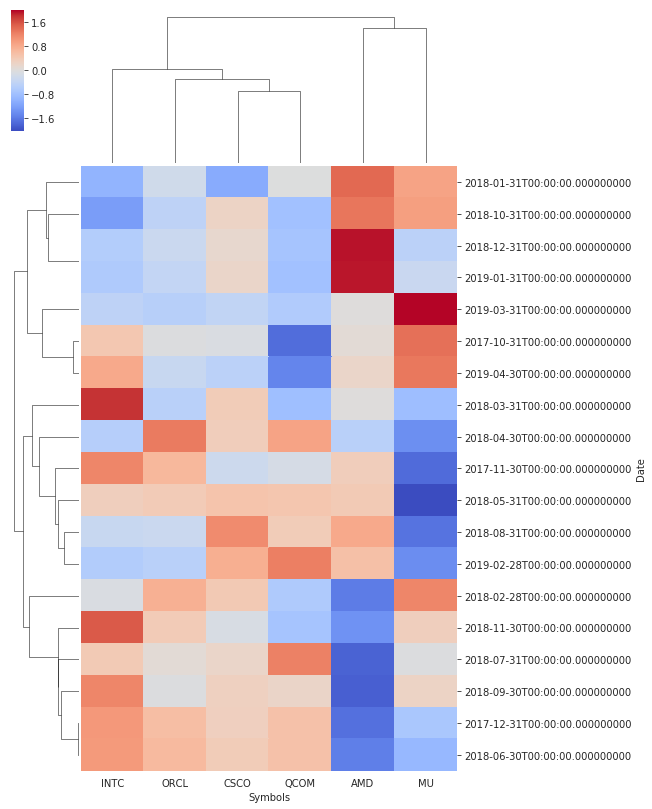

In [13]:
#  Each row is normalized for it's daily return with a z-score
#  The values are measured by correlation
#  Dendrogram displays the results of the cluster analysis
graph_returns_month = sns.clustermap(tech_month_change.dropna(), metric="correlation", method='single', 
                                z_score=0, col_cluster=True,
                                cmap='coolwarm',
                               figsize=(8,14))

## Daily Cumulative Return
-------

In [14]:
tech_cum_daily_return = (1 + tech_daily_change).cumprod()

##### Total Cumulative Stock Return

In [23]:
tech_cum_daily_return.tail(1) 

Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
Date,,,,,,
2019-04-11,2.028467,1.731713,1.460477,1.007146,1.14327,1.112436


### Summary of Daily Cumulative Returns

In [24]:
tech_cum_daily_return.describe()

Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,1.277916,1.338163,1.254666,1.081707,1.022797,1.150449
std,0.455390,0.157921,0.103919,0.175521,0.052296,0.112411
min,0.695620,0.991356,0.988398,0.691282,0.895348,0.939304
25%,0.862044,1.273812,1.177798,0.962601,0.985468,1.066338
50%,1.208029,1.335549,1.249527,1.041448,1.018608,1.132535
75%,1.611679,1.430422,1.333551,1.226536,1.051580,1.226510
max,2.388321,1.738565,1.466367,1.491663,1.154889,1.445592


### Visualizing Daily Cumulative Return
The Univariate Daily Cumulative Return

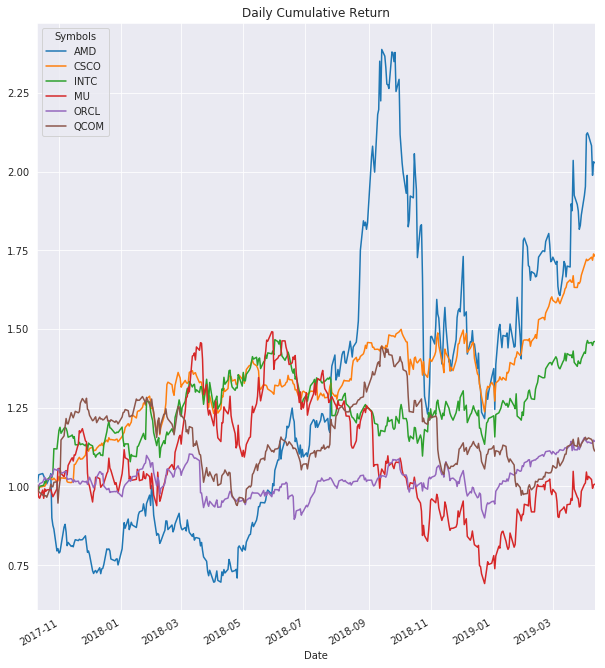

In [16]:
tech_cum_daily_return.plot(legend=True, title='Daily Cumulative Return', figsize=(10,12))


### Test Correlation between the Daily Cumulative Return of each stock

##### Pair plot 
The diagonal shows the distribution of a single variable, the scatter plots
on the upper and lower triangles show the relationship between two variables. 

Linear regression models are fitted to the scatter plots.

kernel density estimates are fitted to the univariate plots 


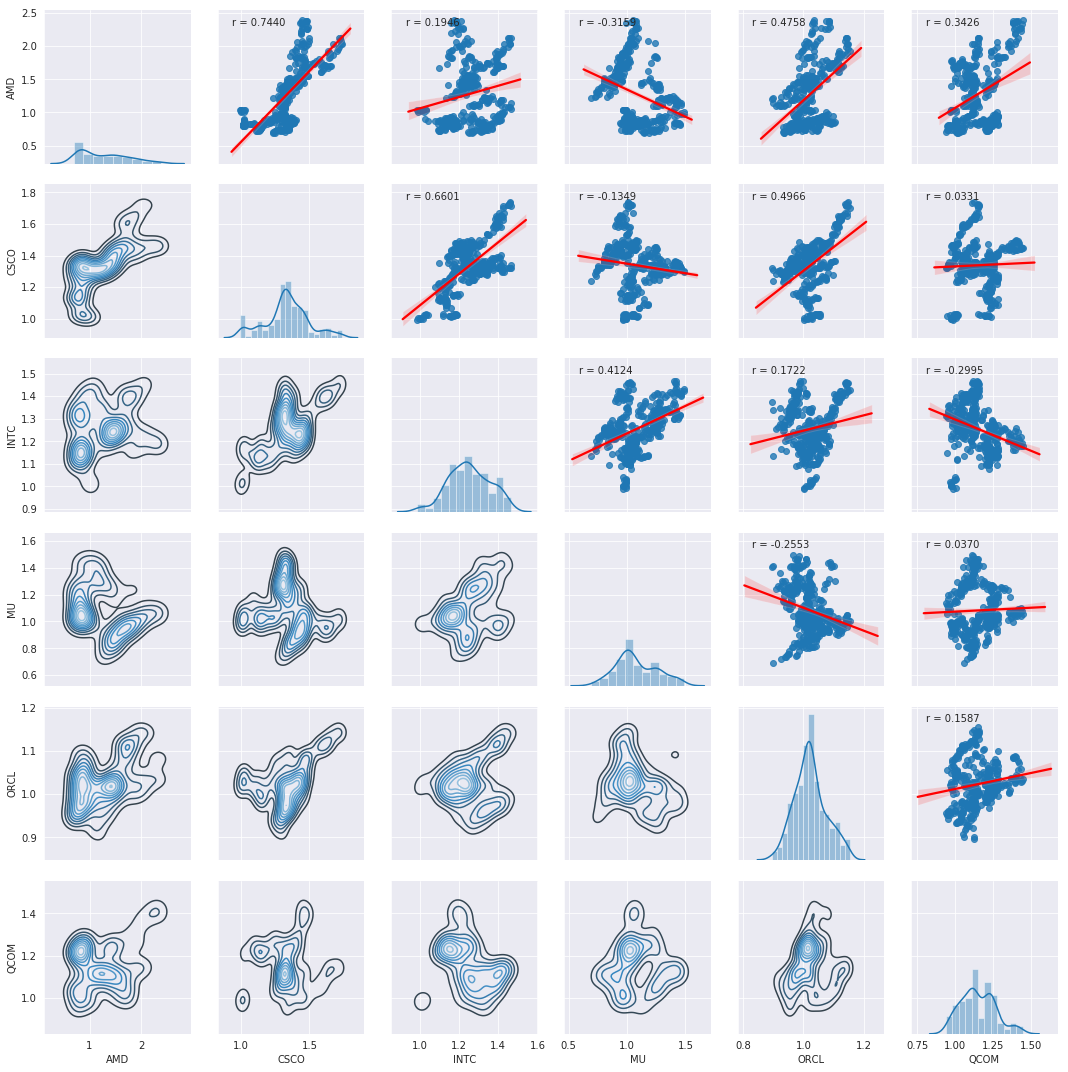

In [17]:
cum_returns_pairplot = sns.PairGrid(tech_cum_daily_return.dropna())
cum_returns_pairplot.map_upper(sns.regplot, fit_reg=True, line_kws= {'color' : 'red'})
cum_returns_pairplot.map_lower(sns.kdeplot, cmap="Blues_d")
cum_returns_pairplot.map_diag(sns.distplot)
cum_returns_pairplot.map_upper(corrfunc)


##### Correlation Matrix of Cumulative Daily Returns

In [18]:
# Correlation Matrix of Daily Returns
cumu_returns_corr = tech_cum_daily_return.dropna().corr()
cumu_returns_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
Symbols,,,,,,
AMD,1,0.744,0.195,-0.316,0.476,0.343
CSCO,0.744,1,0.66,-0.135,0.497,0.0331
INTC,0.195,0.66,1,0.412,0.172,-0.3
MU,-0.316,-0.135,0.412,1,-0.255,0.037
ORCL,0.476,0.497,0.172,-0.255,1,0.159
QCOM,0.343,0.0331,-0.3,0.037,0.159,1


##### Cluster Map of Cumulative Daily Returns  

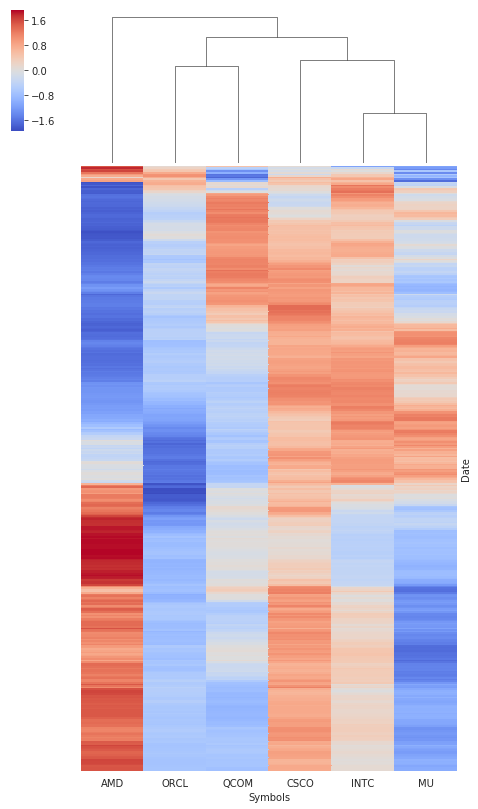

In [19]:
#  Each row is normalized for it's daily return with a z-score
#  The values are measured by correlation
#  Dendrogram displays the results of the cluster analysis
graph_cum_returns = sns.clustermap(tech_cum_daily_return.dropna(), metric="correlation", method='single', 
                                z_score=0, row_cluster=False,
                                cmap='coolwarm',
                                yticklabels=False, figsize=(8,14))

## Quantify Risk of Stock's Daily Return
Quantify risk by comparing expected return with the standard deviation of returns

In [26]:
tech_daily_change.dropna()
quantify_risk = pd.DataFrame()
quantify_risk['Expected Return'] = tech_daily_change.mean()
quantify_risk['Risk'] = tech_daily_change.std()
quantify_risk

,Expected Return,Risk
Symbols,,
AMD,0.002654,0.039583
CSCO,0.001569,0.014942
INTC,0.001201,0.019850
MU,0.000476,0.030250
ORCL,0.000459,0.014355
QCOM,0.000457,0.018723


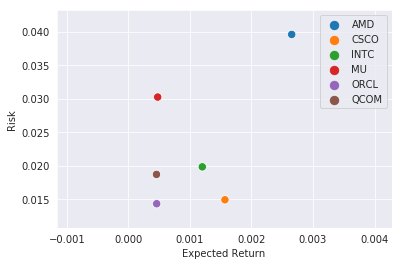

In [28]:
sns.set_style("darkgrid")
sns.scatterplot(x='Expected Return', y='Risk', data=quantify_risk, 
                hue=ticker_index_data,
                legend='full',
                size=ticker_index_data,
                sizes=(70,70))

## Test Correlation Between Trading Volume (log scaled) of each stock

In [21]:
#  Get the log scaled trading volume data
log_volume = data.DataReader(ticker_index_data, 'yahoo', start, end)['Volume']
log_volume = np.log(log_volume)

##### Pairplot

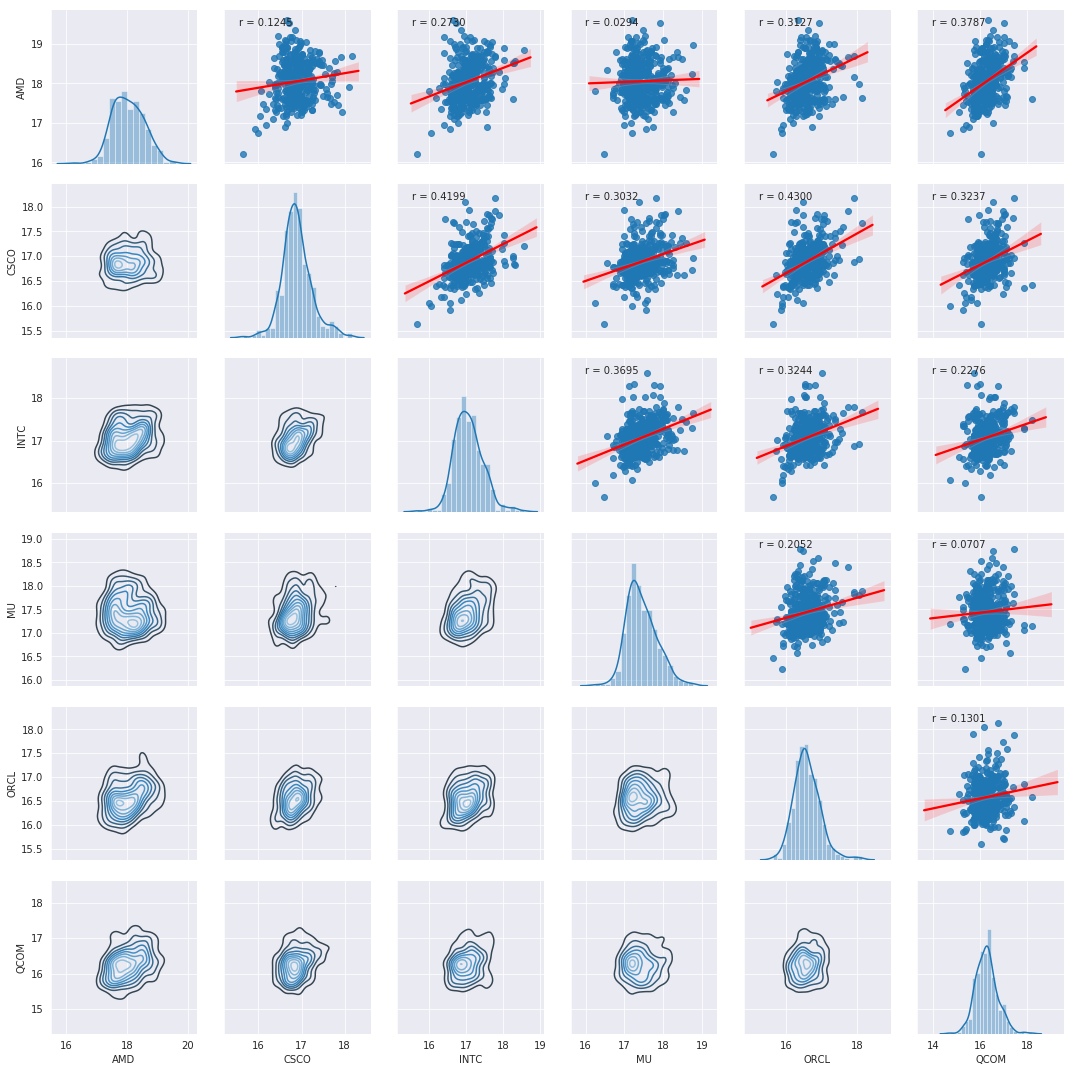

In [22]:
trade_volume_pairplot = sns.PairGrid(log_volume.dropna())
trade_volume_pairplot.map_upper(sns.regplot, fit_reg=True, line_kws= {'color' : 'red'})
trade_volume_pairplot.map_lower(sns.kdeplot, cmap="Blues_d")
trade_volume_pairplot.map_diag(sns.distplot)
trade_volume_pairplot.map_upper(corrfunc)

##### Correlation Matrix of Trading Volume

In [23]:
#  Trading Volume Correlation matrix
trading_volume_corr = log_volume.corr()
trading_volume_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
Symbols,,,,,,
AMD,1,0.125,0.273,0.0294,0.313,0.379
CSCO,0.125,1,0.42,0.303,0.43,0.324
INTC,0.273,0.42,1,0.37,0.324,0.228
MU,0.0294,0.303,0.37,1,0.205,0.0707
ORCL,0.313,0.43,0.324,0.205,1,0.13
QCOM,0.379,0.324,0.228,0.0707,0.13,1


###### Cluster Map of Trading Volume 

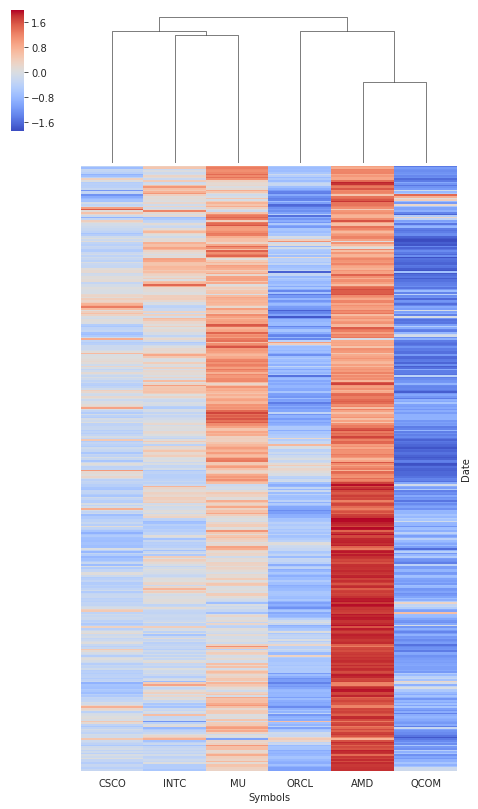

In [30]:
#  Each row is normalized for it's daily return with a z-score
#  The values are measured by correlation
#  Dendrogram displays the results of the cluster analysis
graph_volume = sns.clustermap(log_volume.dropna(), metric="correlation", method='single', 
                       z_score=0, row_cluster=False, 
                        cmap='coolwarm',
                        yticklabels=False, figsize=(8,14))
